In [2]:
import pandas as pd 

import matplotlib
from matplotlib import pyplot as plt
import numpy as np

import seaborn as sns

Matplotlib is an super powerful library, and will let you make almost any graphic you can imagine. Because it is so customizable, there have been a few higher level APIs built on top of it, that abstract with some of the lowest level specifications. We'll start with some basics to get the hang of how to define Matplotlib graphs, then we'll take a run through some of the higher level tools.

In [3]:
#grab your favorite wines from the wine labs

data = pd.read_csv("https://raw.githubusercontent.com/Zipcoder/DataEngineering.Labs.Libraries/master/Pandas%20-%20Part%203%20(feature%20engineering)/my%20favorite%20wines.csv?token=ALOLXOKRHVALDKAMD3YS6FC6F32XC", index_col=0)

In [4]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,sweet?,I like it
6436,6.5,0.28,0.38,7.8,0.031,54.0,216.0,0.99154,3.03,0.42,13.10,6,white,True,True
6439,6.8,0.34,0.36,8.9,0.029,44.0,128.0,0.99318,3.28,0.35,11.95,7,white,True,True
6456,7.5,0.38,0.33,9.2,0.043,19.0,116.0,0.99444,3.08,0.42,11.40,6,white,True,True
6469,6.1,0.32,0.28,6.6,0.021,29.0,132.0,0.99188,3.15,0.36,11.45,7,white,True,True
6485,6.2,0.21,0.28,5.7,0.028,45.0,121.0,0.99168,3.21,1.08,12.15,7,white,True,True


Ok - let's first grab a slice of this df. We're going to do some visualization, so let's drop the last three columns for now.

In [5]:
data.drop(labels=['color', 'sweet?', 'I like it'], axis=1, inplace=True)

Take note of the 'inplace' argument above. If we didn't specify it as True, we'd just get a view of the df, without actually altering it.

In [6]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6436,6.5,0.28,0.38,7.8,0.031,54.0,216.0,0.99154,3.03,0.42,13.10,6
6439,6.8,0.34,0.36,8.9,0.029,44.0,128.0,0.99318,3.28,0.35,11.95,7
6456,7.5,0.38,0.33,9.2,0.043,19.0,116.0,0.99444,3.08,0.42,11.40,6
6469,6.1,0.32,0.28,6.6,0.021,29.0,132.0,0.99188,3.15,0.36,11.45,7
6485,6.2,0.21,0.28,5.7,0.028,45.0,121.0,0.99168,3.21,1.08,12.15,7


## There we go! Ok - now for the pretty colors. 


There are lots of ways to start the process of EDA, so let's start with looking at basic correlations. Before we make any graphs though, take a look at the picture below. Easch of the elements in the chart, is a separate, individually programmable feature in a Matplotlib graph.

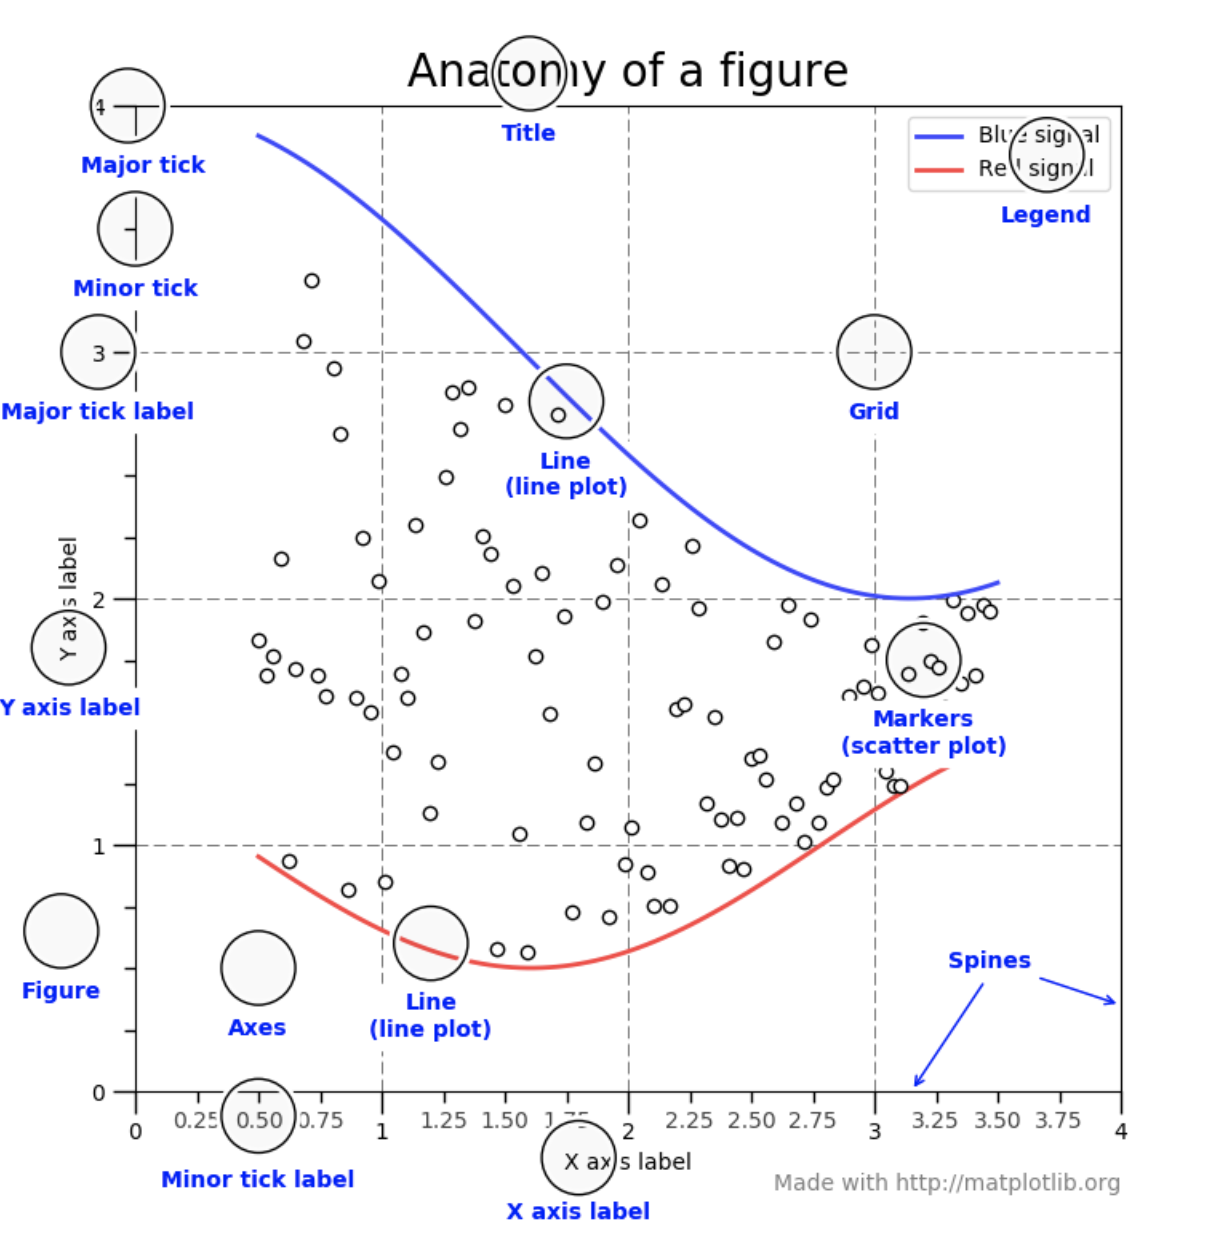

I'll give you the first graph for free :) This one actually uses Seaborn, which I like for quick heatmapping. We'll touch on Seaborn a bit later, as it's one of the higher level APIs I mentioned above.

# Heatmaps (Freebie :))

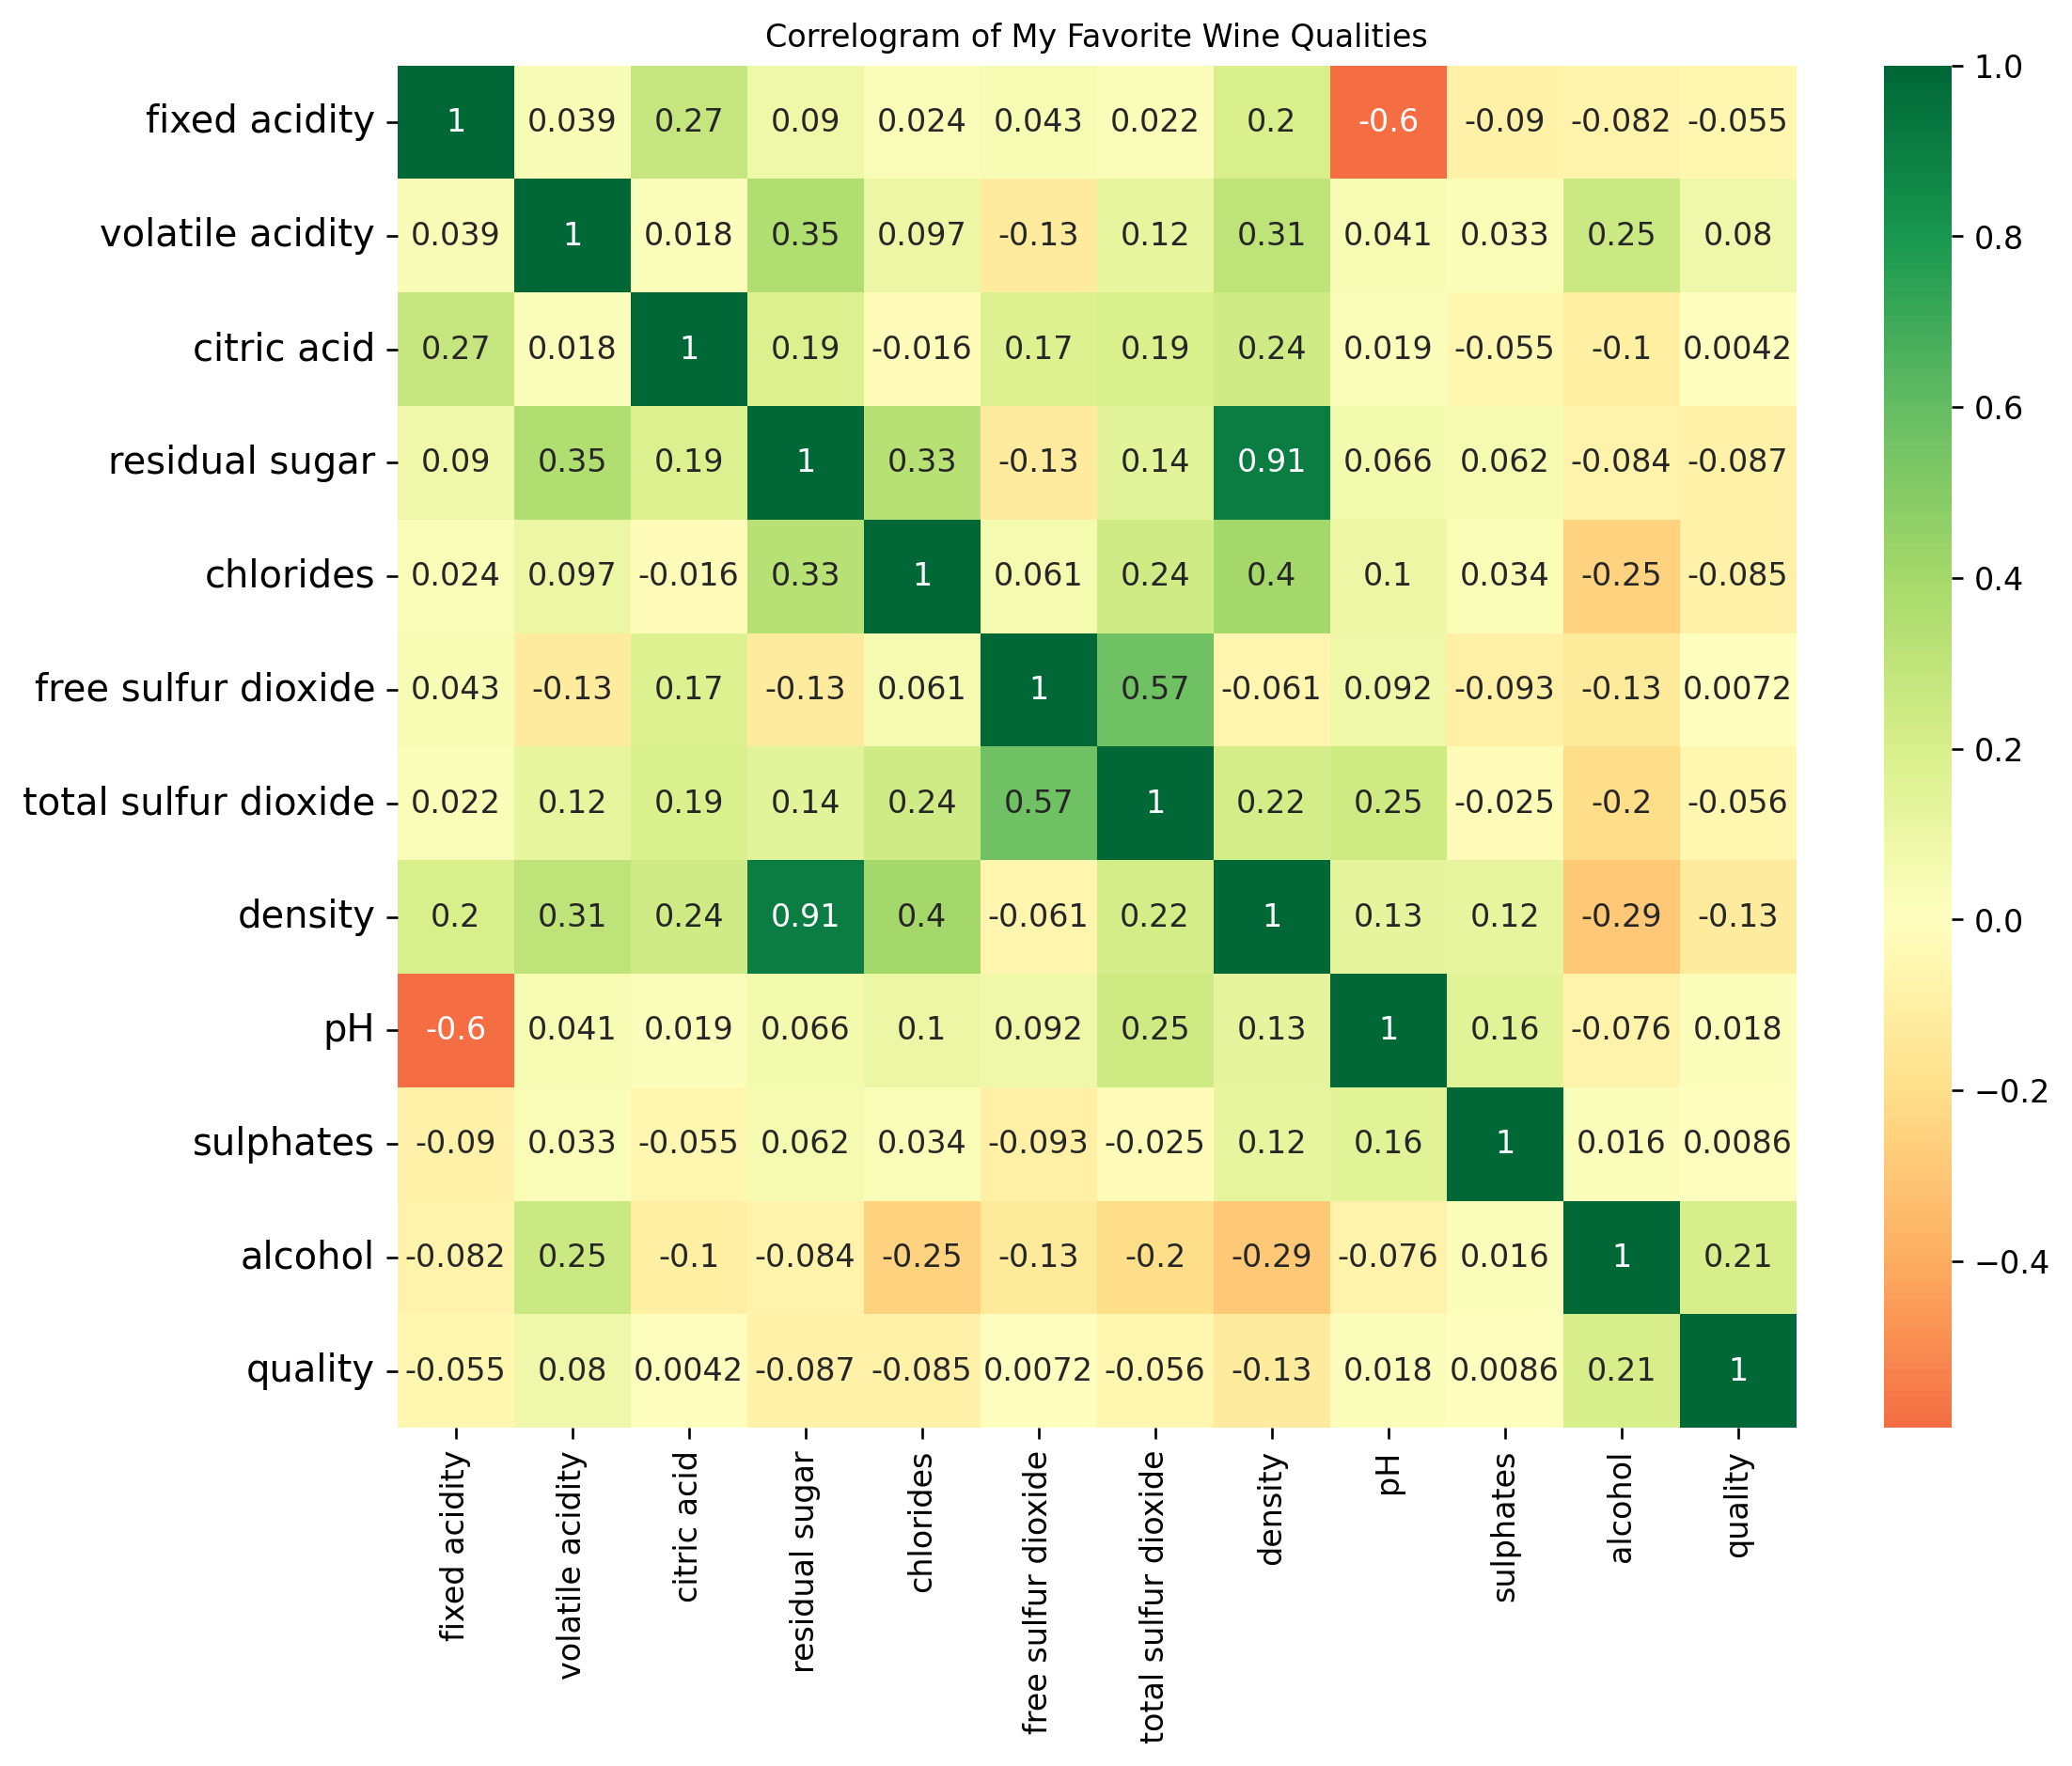

In [7]:
#create a heatmap showing the correlations between each of the columns

plt.figure(figsize=(10,8), dpi= 240)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, 
            yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of My Favorite Wine Qualities', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)
plt.show()

Let's take a look at both the high correlation features as well as the low.

# Scatter Plots

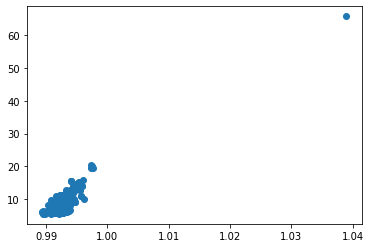

In [8]:
#start really simple here. show a scatter plot of residual sugars against density

plt.scatter(x=data['density'], y=data['residual sugar'])
plt.show()

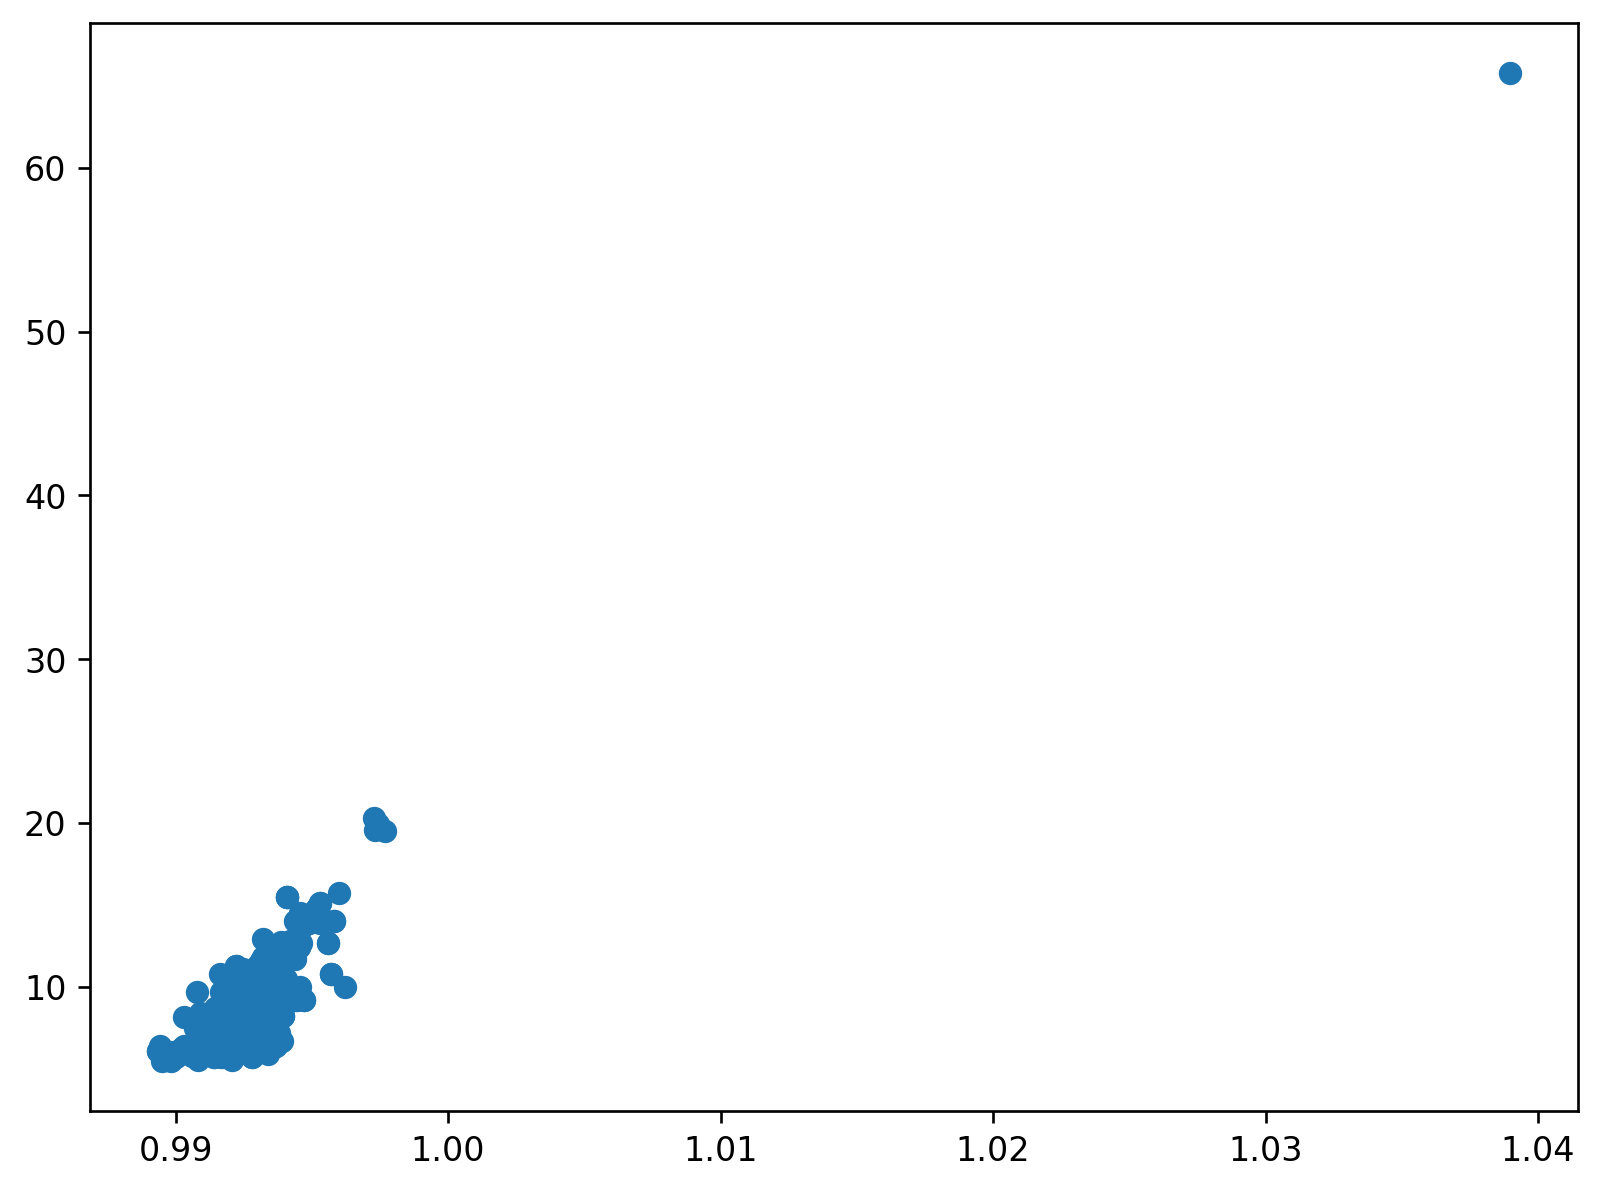

In [9]:
#unless you predefined the graph size, you probably noticed the graph rendered quite small. Let's make it a bit bigger

plt.figure(figsize=(8,6), dpi= 240)
plt.scatter(x=data['density'], y=data['residual sugar'])
plt.show()

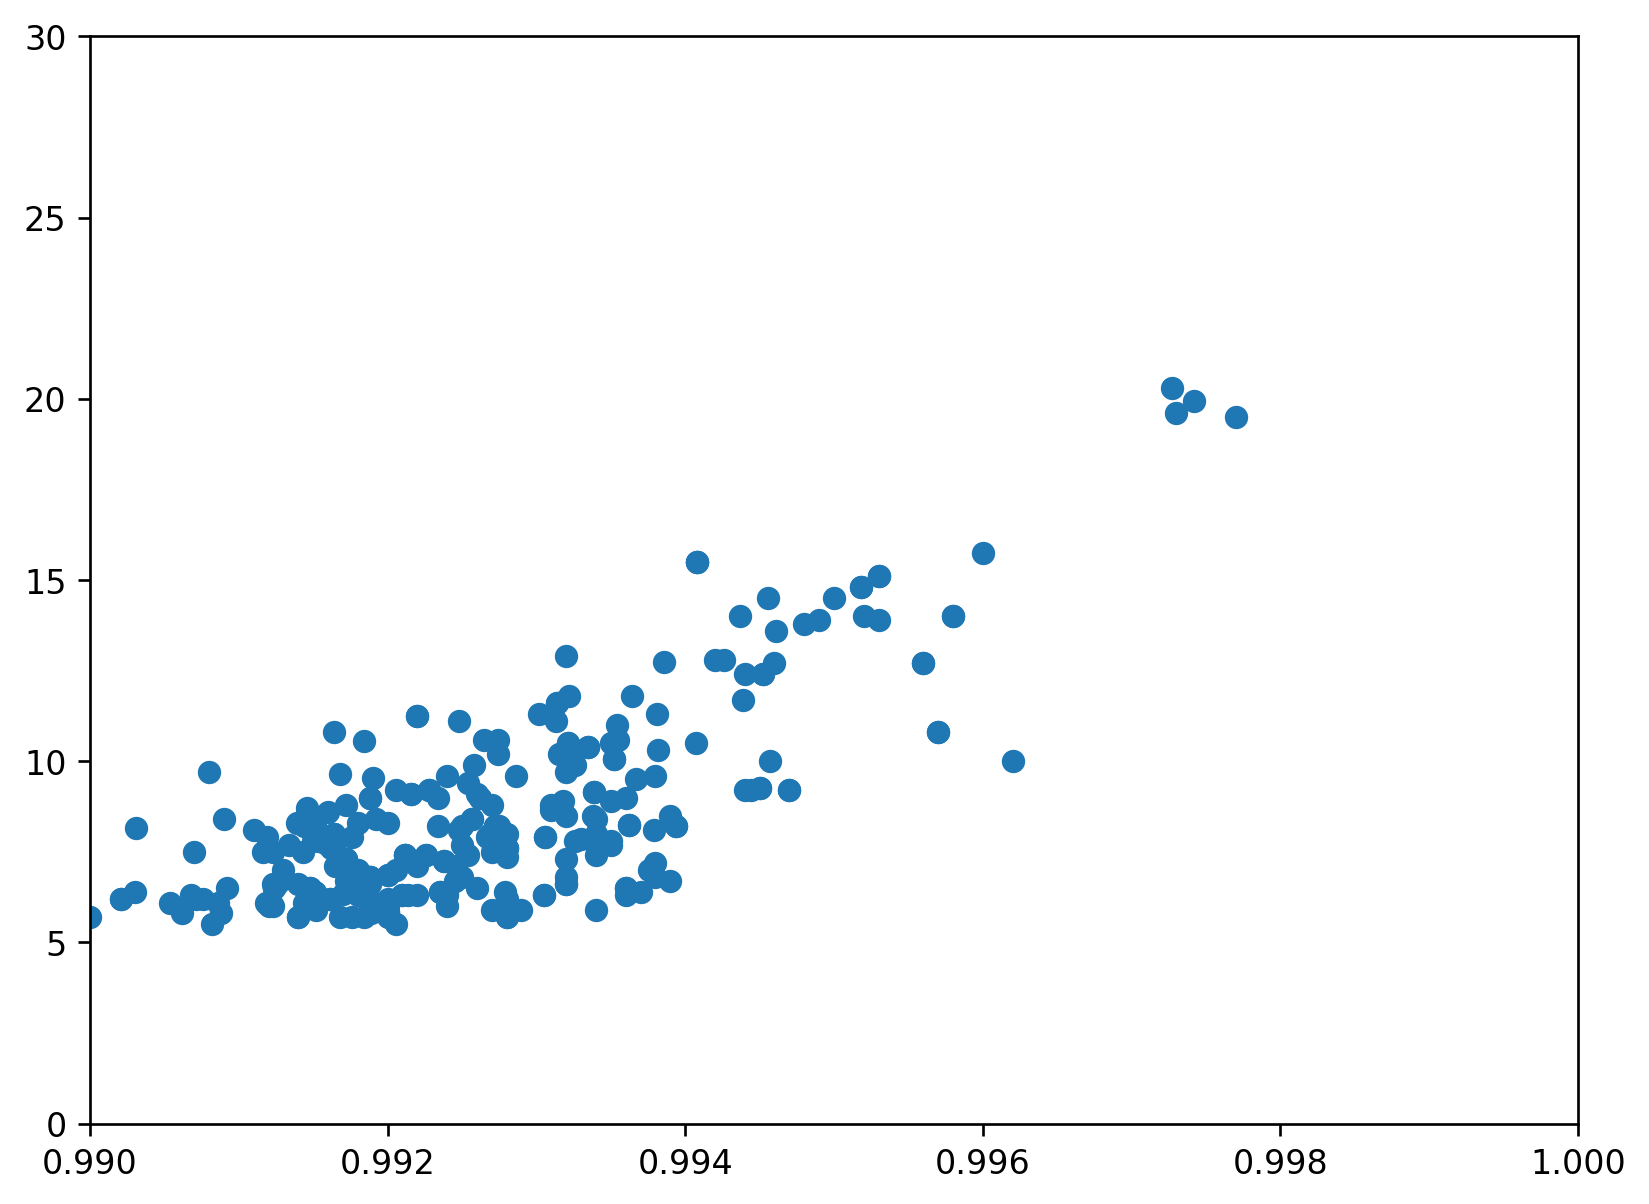

In [10]:
#let's put some limits on the axis, so it doesn't get blown out by that one pesky outlier

plt.figure(figsize=(8,6), dpi= 240)
plt.xlim(0.99, 1)
plt.ylim(0, 30)
plt.scatter(x=data['density'], y=data['residual sugar'])
plt.show()

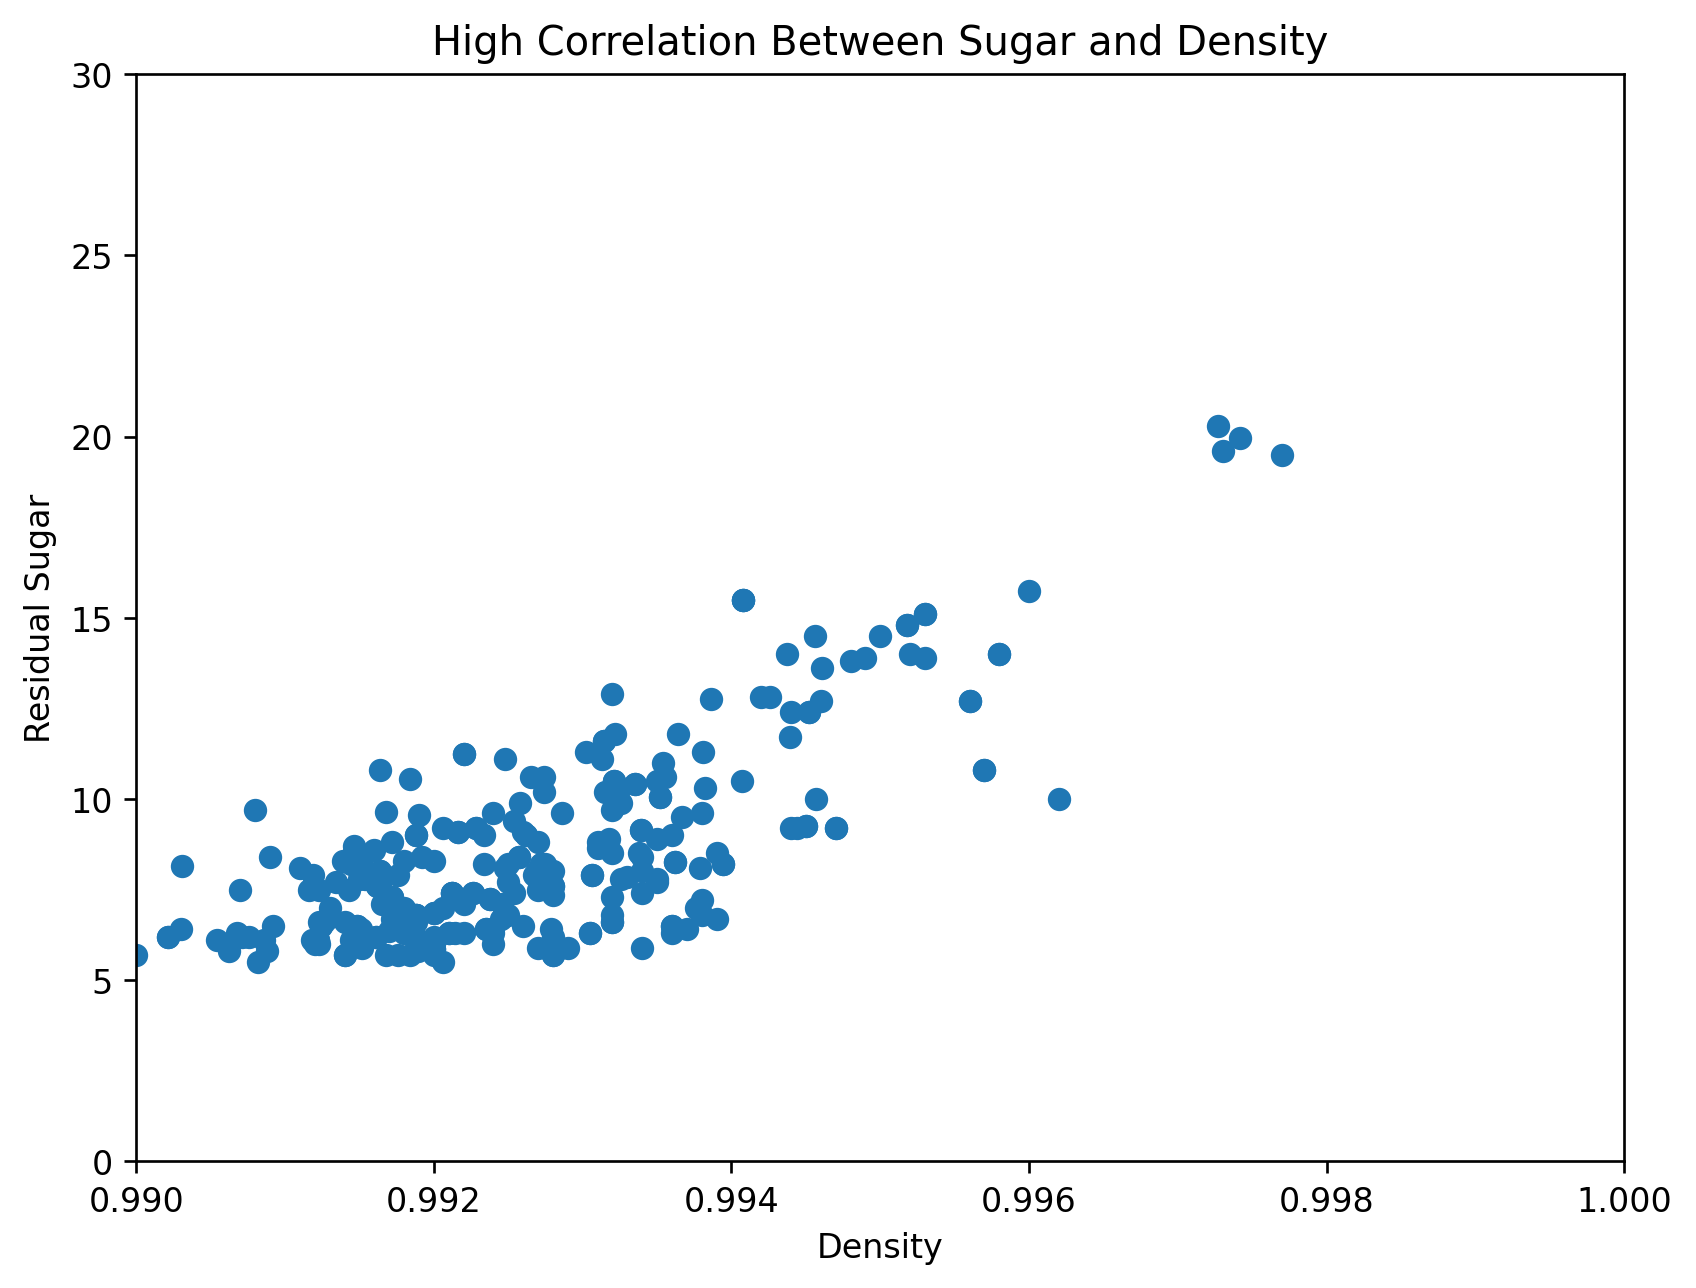

In [11]:
#add some axis labels, and a title

plt.figure(figsize=(8,6), dpi= 240)
plt.xlim(0.99, 1)
plt.ylim(0, 30)
plt.xlabel('Density'), plt.ylabel('Residual Sugar')
plt.title('High Correlation Between Sugar and Density')
plt.scatter(x=data['density'], y=data['residual sugar'])
plt.show()

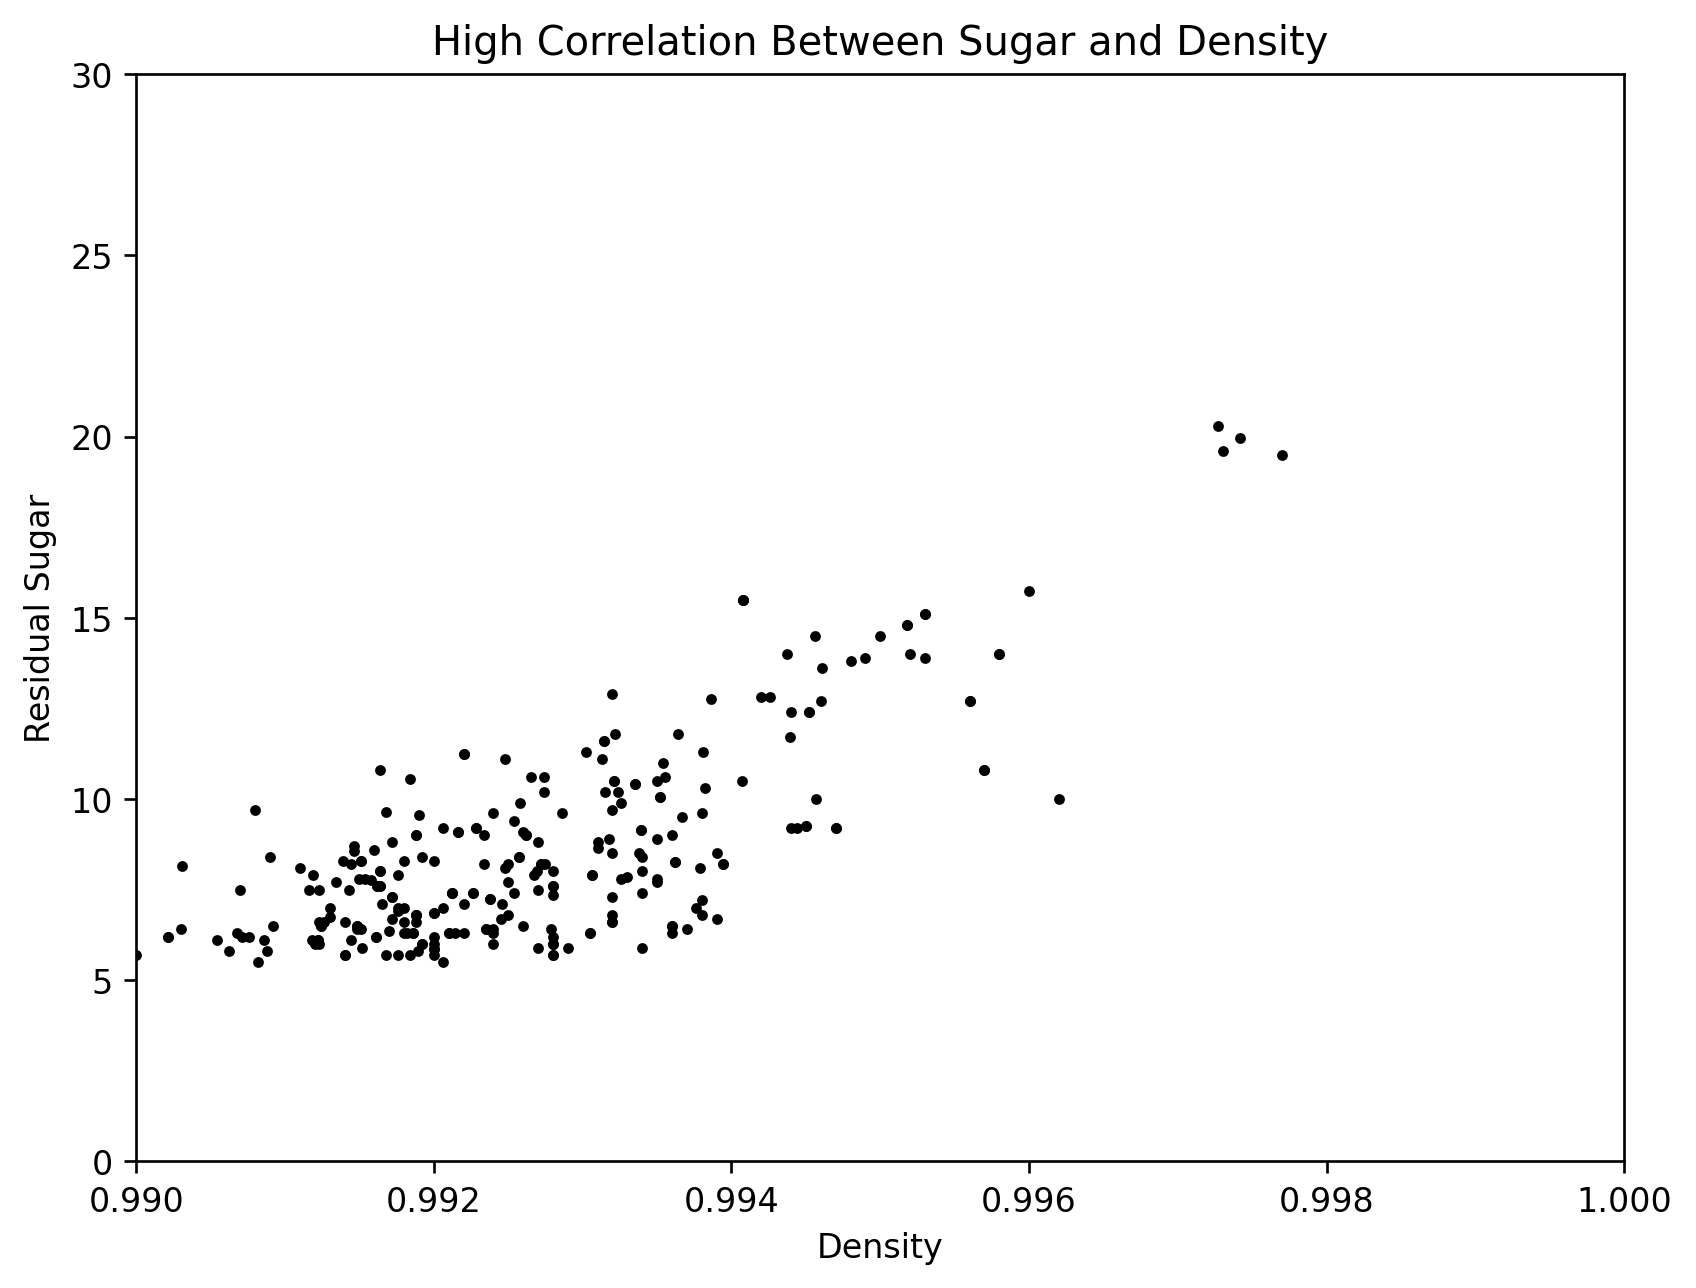

In [12]:
#change the dot colors to something other than the default (blue usually), and make them smaller

plt.figure(figsize=(8,6), dpi= 240)
plt.xlim(0.99, 1)
plt.ylim(0, 30)
plt.xlabel('Density'), plt.ylabel('Residual Sugar')
plt.title('High Correlation Between Sugar and Density')
plt.scatter(x=data['density'], y=data['residual sugar'], s=5, c= 'black')
plt.show()

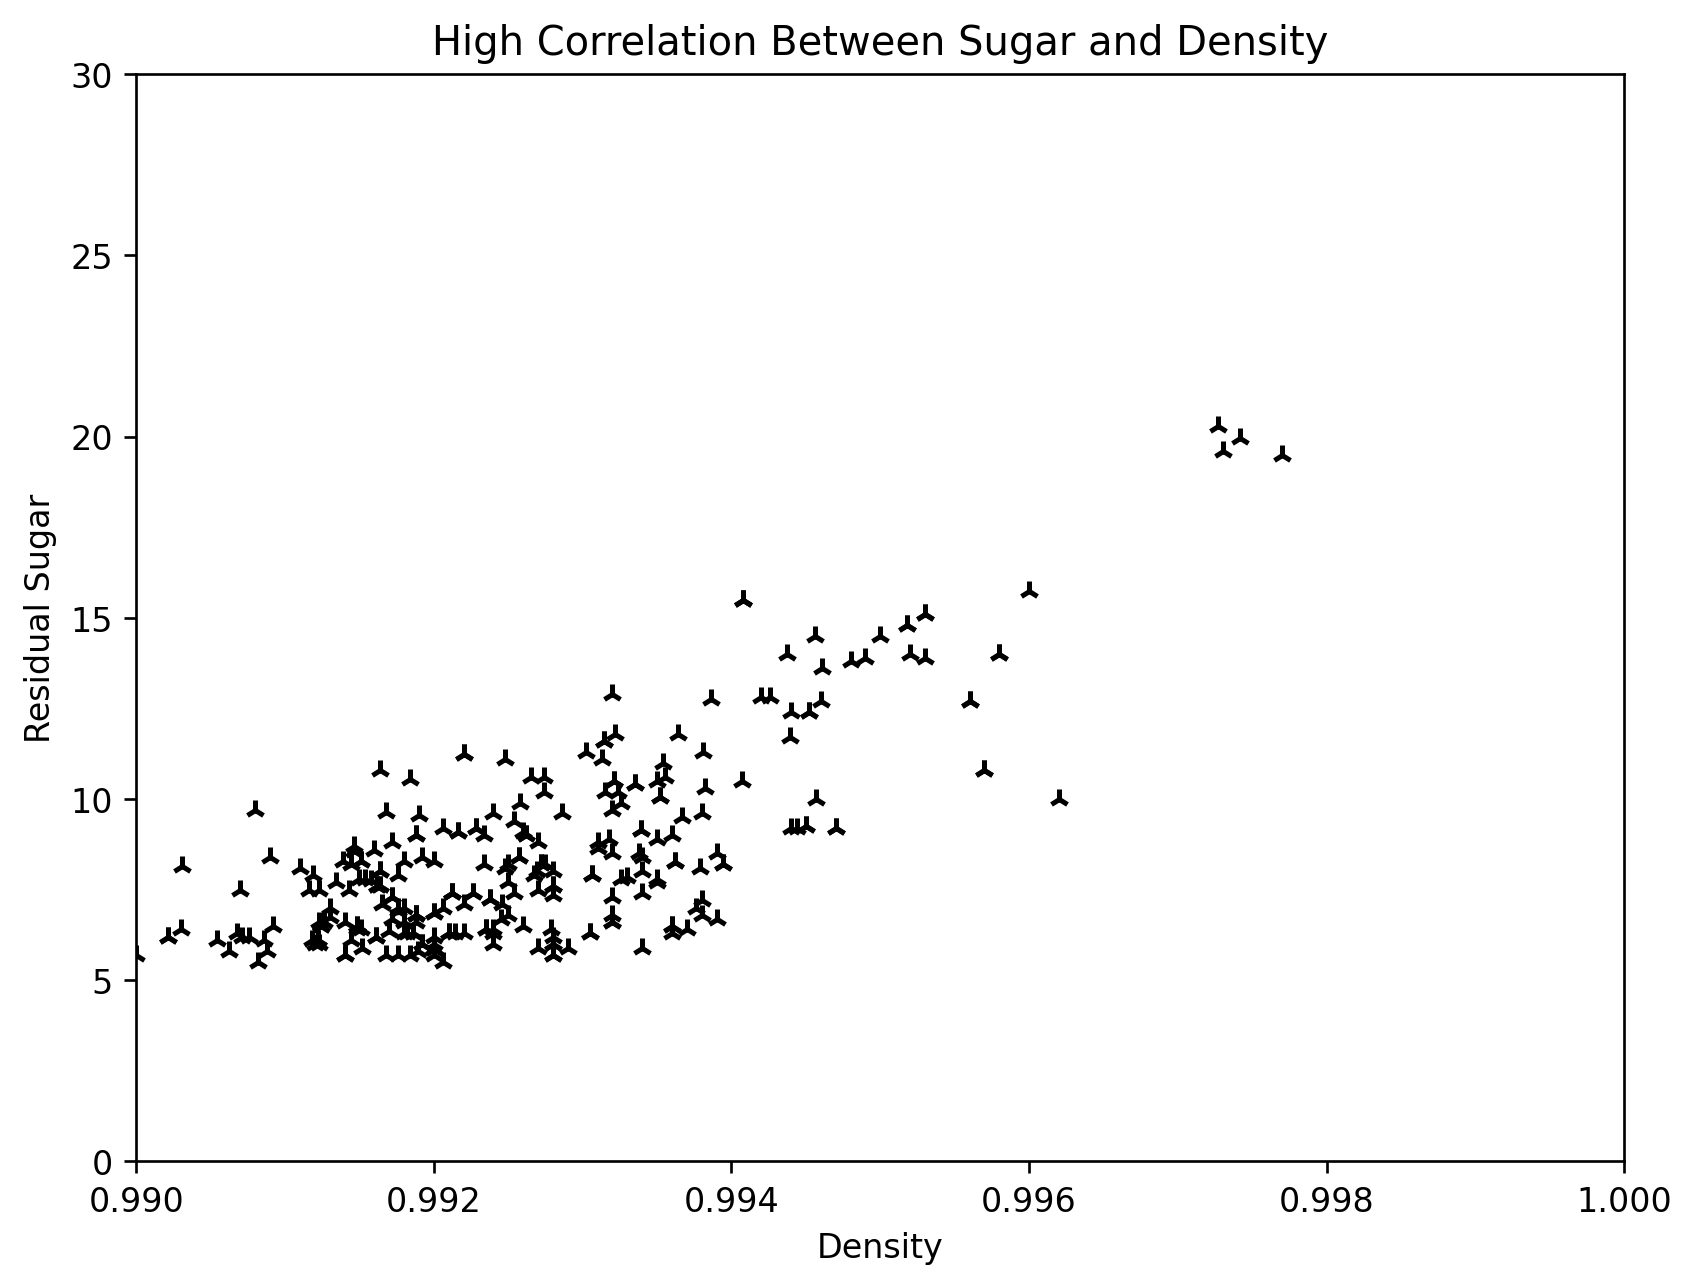

In [13]:
#change the marker for each data point. Default is generally a dot, so try something else.

plt.figure(figsize=(8,6), dpi= 240)
plt.xlim(0.99, 1)
plt.ylim(0, 30)
plt.xlabel('Density'), plt.ylabel('Residual Sugar')
plt.title('High Correlation Between Sugar and Density')
plt.scatter(x=data['density'], y=data['residual sugar'], c= 'black', marker='2')
plt.show()

## Bonus points! Add a trendline to your graph above. As a hint, it will take a few steps. There isn't a one step way of doing it.

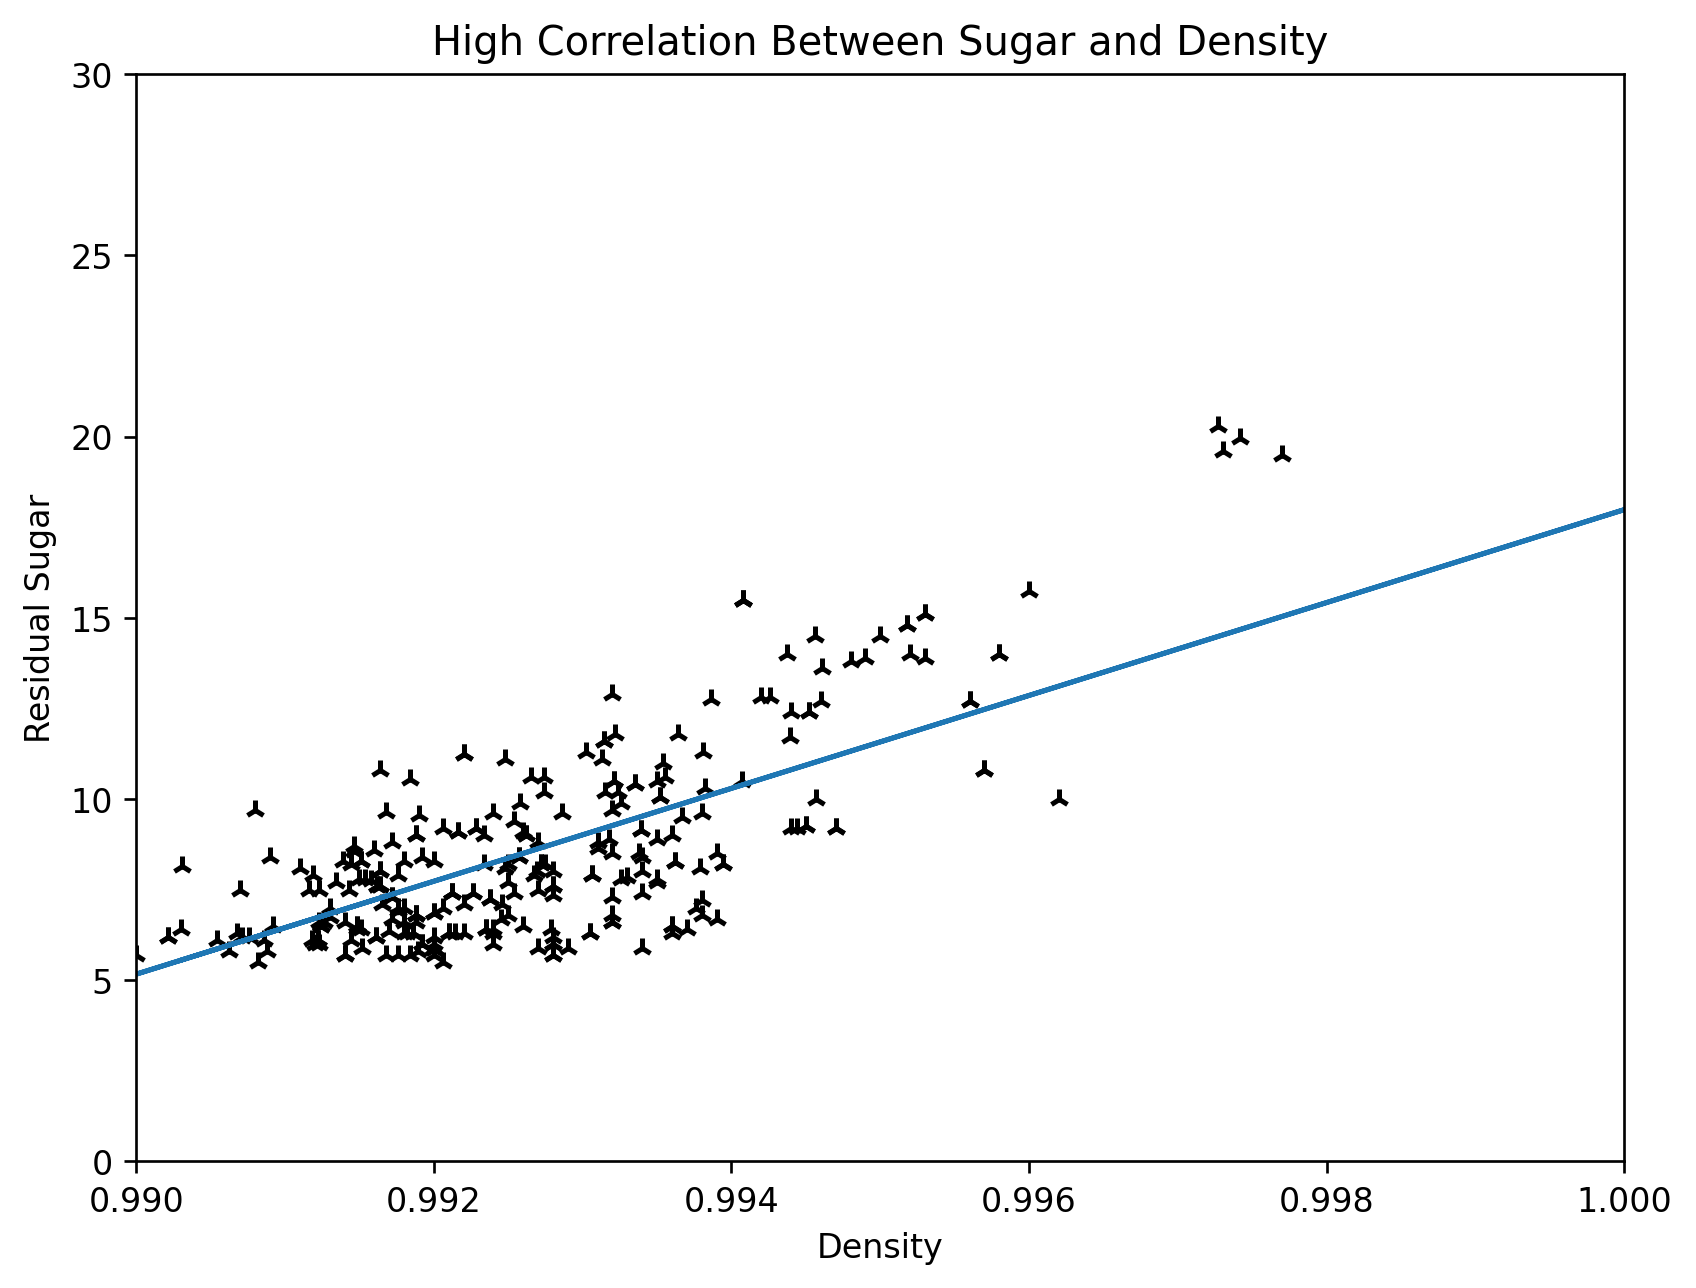

In [14]:
#Define the variables needed to add a trendline. Then graph the trendline over the original data.


fit = np.polyfit(x=data['density'], y=data['residual sugar'], deg=1)
line = np.poly1d(fit)

plt.figure(figsize=(8,6), dpi= 240)
plt.xlim(0.99, 1)
plt.ylim(0, 30)
plt.xlabel('Density'), plt.ylabel('Residual Sugar')
plt.title('High Correlation Between Sugar and Density')
plt.scatter(x=data['density'], y=data['residual sugar'], c= 'black', marker='2')
plt.plot(data['density'], line(data['density']))
plt.show()

## Now let's take a look at some low/no correlation features

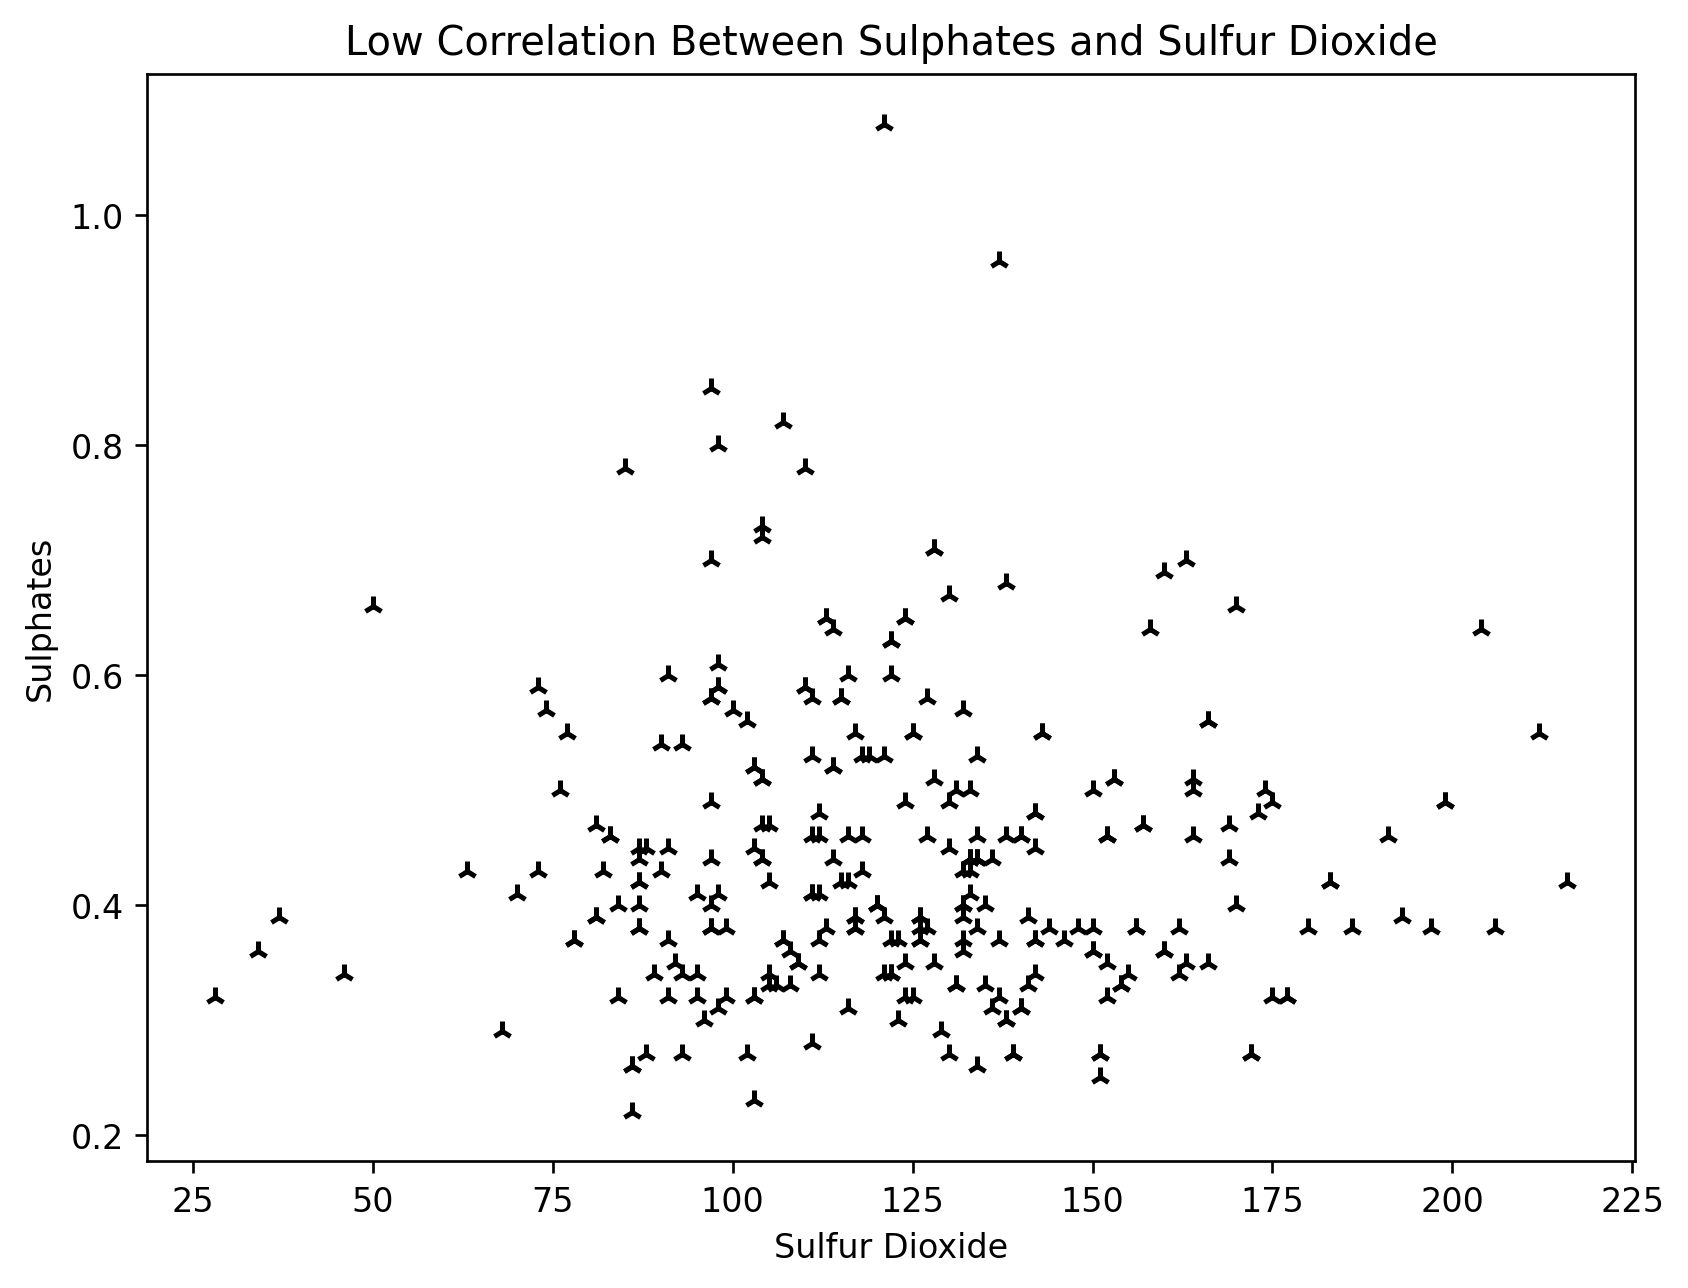

In [16]:
#replicate the chart above with two features that have little correlation w/ each other



plt.figure(figsize=(8,6), dpi= 240)

plt.xlabel('Sulfur Dioxide'), plt.ylabel('Sulphates')
plt.title('Low Correlation Between Sulphates and Sulfur Dioxide')
plt.scatter(x=data['total sulfur dioxide'], y=data['sulphates'], c= 'black', marker='2')
plt.show()

# Histograms

Let's take a look at histograms now. Just like the scatter we did above, histograms can be very helpful in the early stage EDA process, when you aren't quite sure yet what you're looking at. Histograms can help you figure out things like:

 - Is my data normally distributed?
 - Is outlier detection and handling going to be important in for this data?
     - Is this detection going to be statistically based, or used just to catch what seems like erroneous input?
 - Is my data continuous, or is it discrete values?

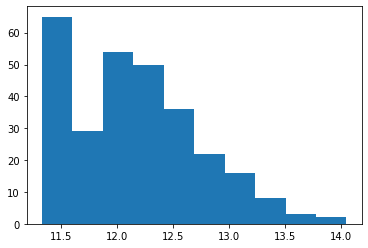

In [17]:
#plot the distribution of alcohol content

plt.hist(x=data['alcohol'])
plt.show()

You'll notice, the graph probably looks a little blocky. This is because of the bin size. Bins are basically the number of chunks you're 'binning' the data into. For example, with a bin size of 1, you'd have a histogram with a height equal to the number of rows in your data, and a width that starts at the min and ends at the max of your data.

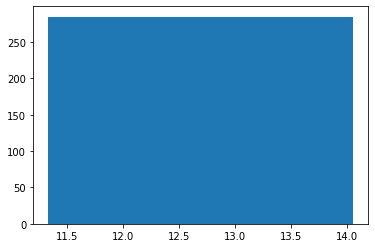

In [18]:
#try a bin size of 1 and see what happens

plt.hist(x=data['alcohol'], bins=1)
plt.show()

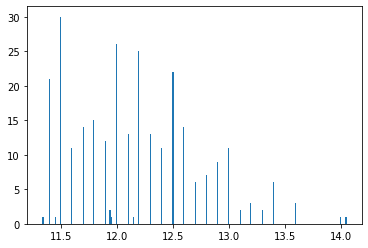

In [19]:
#Now try a bin size that equals the length of your data. What do you notice now?

plt.hist(x=data['alcohol'], bins=len(data['alcohol']))
plt.show()

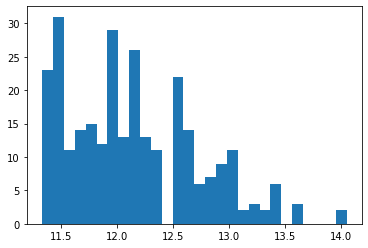

In [20]:
#try a bin size that is 1/10th the number of data points in the array

plt.hist(x=data['alcohol'], bins=int(len(data['alcohol'])/10))
plt.show()